<h1>Newark international Airport's current capabilities</h1>

In [55]:
import os
from datetime import time, datetime
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#This cell stores functions and methods useful across the analysis, like an utils files
def sep_identifier(file_path):
    """Function to detect, collect and return the kind of 
    delimiter of each file"""
    with open(file_path, encoding='utf-8') as csvfile:
        dialect = csv.Sniffer().sniff(csvfile.read())
        return dialect.delimiter

<h2>Exploratory Data Analysis</h2>

In [3]:
path = './dataset/'

In [4]:
df = pd.read_csv("./dataset/nyc_airlines.csv")

In [5]:
dataframes = {}
for file in os.listdir(path):
    full_path = os.path.join(path, file)
    if file.endswith('.csv'):
        df = pd.read_csv(
                filepath_or_buffer= full_path,
                sep= sep_identifier(full_path))
        name = file.split(".")[0]
        dataframes[name] = df

In [6]:
#List of the dataframes names
dataframes.keys()

dict_keys(['nyc_weather', 'nyc_flights_fixed', 'nyc_planes', 'nyc_airlines', 'nyc_airports'])

In [7]:
dataframes['nyc_weather'].head(1)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z


In [8]:
dataframes['nyc_airports'].head(2)

,faa,name,latitude,longitude,altitude,timezone,dst,timezone_name
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago


In [89]:
dataframes['nyc_flights_fixed'].head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,date
0,0,2013,1,1,517,515,2,830,819,11,...,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 10:00:00+00:00,2013-01-01
1,1,2013,1,1,533,529,4,850,830,20,...,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 10:00:00+00:00,2013-01-01
2,2,2013,1,1,542,540,2,923,850,33,...,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 10:00:00+00:00,2013-01-01
3,3,2013,1,1,554,600,-6,812,837,-25,...,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 11:00:00+00:00,2013-01-01
4,4,2013,1,1,554,558,-4,740,728,12,...,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 10:00:00+00:00,2013-01-01


<h2>Overall Pane</h2>

<b>1. Determine the number of distinct destinations connected to the airport.</b>

In [9]:
destinations = dataframes['nyc_airports']['name'].nunique()
print(f"The number of distinct destinations connected to the airport is: {destinations}")

The number of distinct destinations connected to the airport is: 1440


<b>2. Calculate the rounded average of distinct destinations for each day.</b>

In [26]:
#Parsing time_hour object datatype to datetime
dataframes['nyc_flights_fixed']["time_hour"] = pd.to_datetime(dataframes['nyc_flights_fixed']["time_hour"])

In [39]:
#Creating a date column to have each day of the year
dataframes['nyc_flights_fixed']['date'] = dataframes['nyc_flights_fixed']['time_hour'].apply(lambda x: x.strftime("%Y-%m-%d"))

In [68]:
#Parsing date to datetime64
destinations_by_day['date'] = pd.to_datetime(destinations_by_day['date'])

In [43]:
#Sub dataframe for simplify the analysis
destinations_by_day = dataframes['nyc_flights_fixed'][['dest','date']]

In [50]:
#Unique destinations by day 
destinations_by_day = destinations_by_day.groupby(by="date")['dest'].nunique().reset_index()

In [60]:
#Mean
mean_destination_by_day = round(destinations_by_day["dest"].mean(), 0)

In [61]:
print(f"The average of distinct destinations for each day is {mean_destination_by_day}")

The average of distinct destinations for each day is 81.0


<b>3. Calculate the average number of destinations per day of the week.</b>

In [78]:
destinations_by_day['weekday'] = destinations_by_day['date'].apply(lambda x: x.strftime("%w"))

In [80]:
destinations_by_day.head()

,date,dest,weekday
0,2013-01-01,75,2
1,2013-01-02,82,3
2,2013-01-03,82,4
3,2013-01-04,81,5
4,2013-01-05,82,6


In [81]:
#Average number of destinations per day of the week
destinations_by_day.groupby(by="weekday")["dest"].mean().reset_index()

,weekday,dest
0,0,80.230769
1,1,81.923077
2,2,80.415094
3,3,79.641509
4,4,82.211538
5,5,81.596154
6,6,80.096154


[Text(0.5, 1.0, 'Average destinations per day of week')]

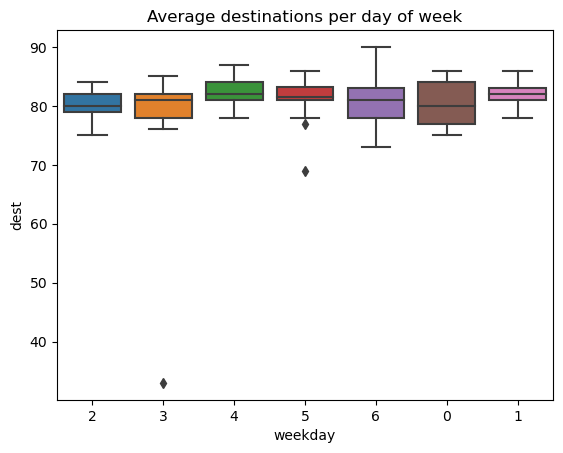

In [84]:
sns.boxplot(data= destinations_by_day, x='weekday', y='dest').set(title= "Average destinations per day of week")

<b>4. Identify the month with the highest number of flights.</b>

In [107]:
monthly_number_of_flights = dataframes['nyc_flights_fixed'].groupby(by='month')['flight'].count().reset_index()
monthly_number_of_flights.sort_values(by="flight",ascending=False)

,month,flight
7,8,24290
9,10,24236
6,7,24174
4,5,23959
2,3,23650
3,4,23424
5,6,23258
11,12,23065
8,9,22954
10,11,22836


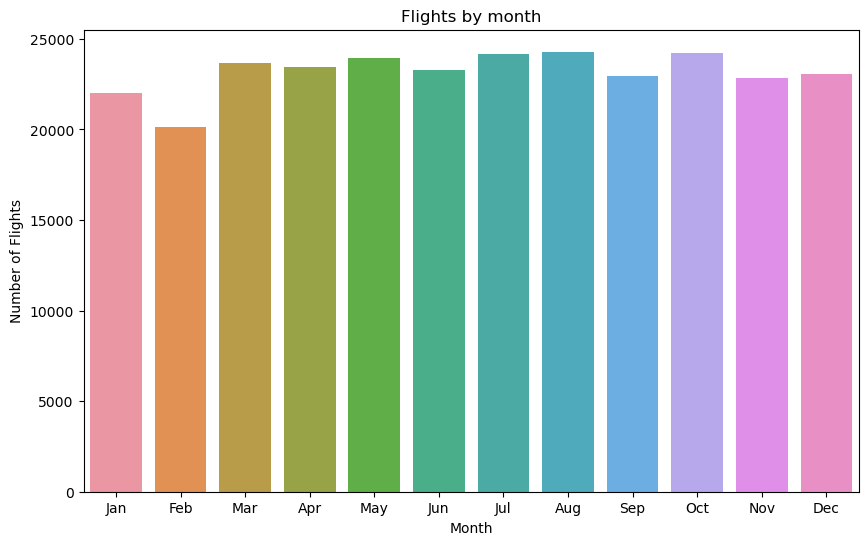

In [104]:
plt.figure(figsize=(10, 6))
sns.barplot(data= monthly_number_of_flights, x='month', y='flight')
plt.title("Flights by month")
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()